<a href="https://colab.research.google.com/github/manish-anandani/Data-Science-Projects/blob/main/Image_compression_using_SVD_and_Low_Rank_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

At the end of the project, we will be able to

* Compress an image using SVD and low rank approximation

In [31]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M1_AST_06_Matrix_Decompositions_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Images/houses.jpg")
    print("Setup completed successfully")
    return

setup()

Setup completed successfully


### Import Required Packages

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image              # to import images in notebook
import sympy as sy
import scipy as sc
from pprint import pprint
%matplotlib inline

### Singular Value Decomposition

Let $A$ be an m x n matrix with rank $r$. Then there exists an m x n matrix $Σ$ for which the diagonal entries in $D$ are the first $r$ singular values of $A$, $\sigma_1≥\sigma_2≥\cdots≥\sigma_r>0$, and there exists an m x m orthogonal matrix $U$ and an n x n orthogonal matrix $V$ such that

$$\begin{equation}
A = U\Sigma V^{T}
\end{equation}.$$


Any factorization $\begin{equation}A = U\Sigma V^{T}\end{equation}$, with $U$ and $V$ orthogonal, $Σ$ as
$\mathbf{Σ} = \begin{bmatrix} D & 0 \\ 0 & 0 \end{bmatrix}$
and positive diagonal entries in $D$, is called a **singular value decomposition** (or SVD) of A. The matrices $U$ and $V$ are not uniquely determined by $A$, but the diagonal entries of $Σ$ are necessarily the singular values of $A$. The columns of $U$ in such a decomposition are called left singular vectors of $A$, and the columns of $V$ are called
right singular vectors of $A$.

#### Image compression using SVD

**Low-rank approximations of $A$**

Let $k$ a natural number, where $k\leq\text{rank}(A)\leq\min\{n, m\}$.

Using SVD-decomposition of $A$, if $A = UDV^T$, then we keep the first $k$ values in $D$ as it is and set the subsequent singular values to zero. Let us denote the resulting diagonal matrix by $D_k$. It is easy to see that we only have to keep the first $k$ columns of $U$ and the first $k$ rows of $V$ since their other columns would be multiplied by zeros anyway as shown in the figure below. To sum up, the matrix $A_k = U_kD_kV_k^T$ is the closest matrix to $A$ having rank $k$, where $U_k$ and $V_k$ consist of the first $k$ columns and rows of $U$ and $V$, respectively.

If $A$ is a large matrix, that is $n,m$ are large and $k$ is relatively small, then the information we need to store to approximate the information content stored in $A$ is much smaller. That is, we can reduce the storage space significantly and we are still able to store almost the same information that the original matrix has.
<center>
<img src= "https://cdn.iisc.talentsprint.com/CDS/Images/svd.png" width= 400 px/>
</center>

Here we will see how low-rank approximation of a matrix provides a solution to compress an image.

Images are represented in a rectangular array where each element corresponds to the grayscale value for that pixel. For colored images we have a $3$-dimensional array of size $n\times m\times 3$, where $n$ and $m$ represents the number of pixels vertically and horizontally, respectively, and for each pixel we store the intensity for colors red, green and blue.

We will repeat the low-rank approximation procedure above on a larger matrix, that is, we create the low-rank approximation of a matrix that represents an image for each color separately. The resulting $3$-dimensional array will be a good approximation of the original image.

In [33]:
def find_optimum_k(A):
    U, s, Vt = np.linalg.svd(A)
    total_variance = np.sum(s**2)
    explained_variance_ratio = []

    for k in range(1, min(A.shape)):
        s_truncated = s[:k]
        A_approx = U[:, :k] @ np.diag(s_truncated) @ Vt[:k, :]
        reconstruction_error = np.linalg.norm(A - A_approx, 'fro')**2
        explained_variance_ratio.append(1 - (reconstruction_error / total_variance))

    # Plot explained variance ratio
    plt.plot(range(1, min(A.shape)), explained_variance_ratio)
    plt.xlabel('k')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs. k')
    plt.show()

    print(explained_variance_ratio)
    # Find the elbow point or a satisfactory level of explained variance ratio
    optimum_k = np.argmax(explained_variance_ratio) + 1

    return optimum_k

# Read image store it as array
image_ = np.array(Image.open('houses.jpg'))


In [34]:
# Normalize the intensity values in each pixel
image = image_ / 255
row, col, _ = image.shape
print("pixels: ", row, "*", col)


pixels:  640 * 1024


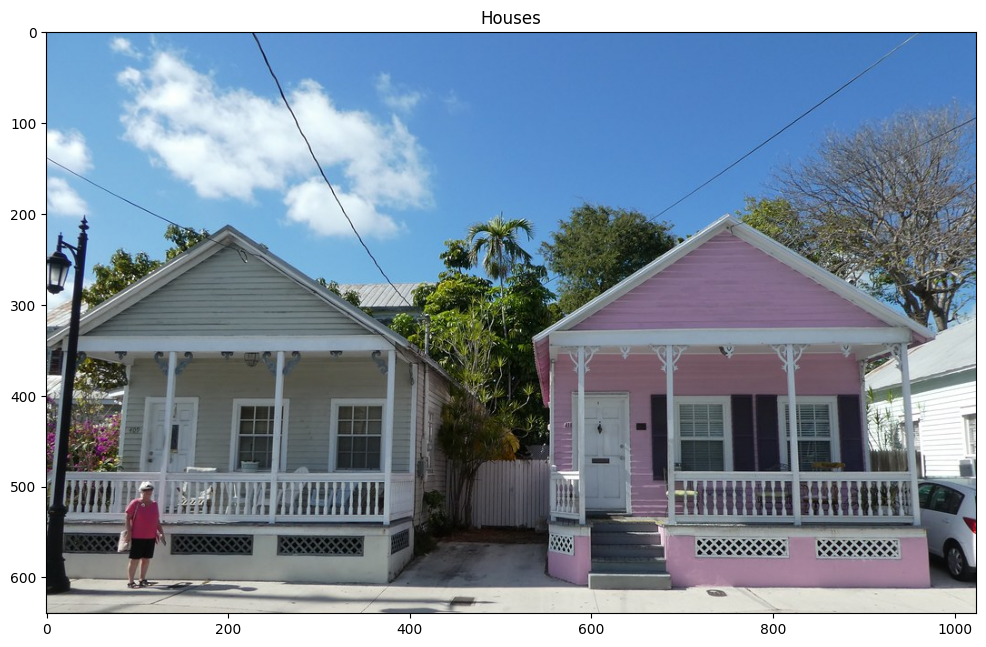

In [35]:
# Display image
fig = plt.figure(figsize=(12, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image)
a.set_title('Houses')
plt.show()

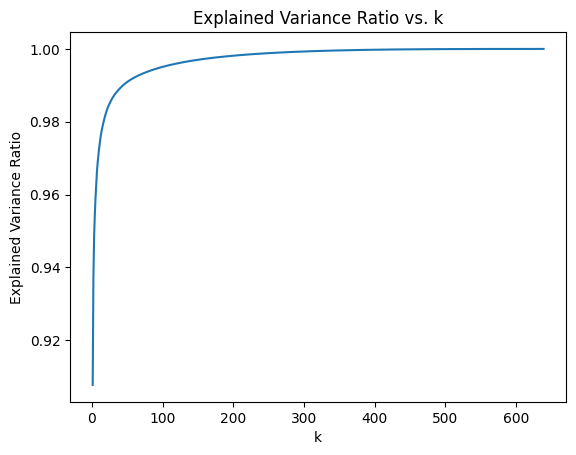

[0.9077270085882639, 0.9370506389895567, 0.9483399732865743, 0.9544365627017511, 0.9591444268416062, 0.9629807174921556, 0.9662907673848043, 0.9687473753540035, 0.970748310070519, 0.9725688253879226, 0.9741475014340079, 0.9755594676797212, 0.976854761545244, 0.9778431914687827, 0.9787874426125727, 0.9796598707243495, 0.9804698263311649, 0.9812397992676467, 0.981946864592199, 0.9825856199762525, 0.9831644071057841, 0.9836979280815731, 0.9842182524480929, 0.9846573808910308, 0.9850872230176336, 0.9854674119195399, 0.9858459704611366, 0.9862086813611639, 0.9865530538598759, 0.9868681047430375, 0.9871563765844896, 0.9874373942087912, 0.987697842010938, 0.9879499959980578, 0.9881942481548797, 0.9884273763684533, 0.988650979185859, 0.9888706850129602, 0.9890754561421766, 0.9892772455446673, 0.9894737179700772, 0.9896645833792915, 0.9898446151969811, 0.990017164515947, 0.9901858057443682, 0.9903513738214338, 0.9905098218175078, 0.9906601152386063, 0.99080883168249, 0.9909497203848175, 0.99108

In [36]:
# Break the image into three different arrays based on colors
image_red = image[:, :, 0]
image_green = image[:, :, 1]
image_blue = image[:, :, 2]

optimum_k = find_optimum_k(image_green)
print(f"Optimum k: {optimum_k}")

In [37]:
# Check for the space needed for original image
original_bytes = image.nbytes
print("The space (in bytes) needed to store this image is", original_bytes)

The space (in bytes) needed to store this image is 15728640


Now perform the SVD-decomposition on the $3$ matrices corresponding to the different colors separately.

In [38]:
# SVD decomposition of three matrices
U_r, D_r, VT_r = np.linalg.svd(image_red, full_matrices=True)
U_g, D_g, VT_g = np.linalg.svd(image_green, full_matrices=True)
U_b, D_b, VT_b = np.linalg.svd(image_blue, full_matrices=True)

In [39]:
# Check for the bytes to be stored
bytes_to_be_stored = sum([matrix.nbytes for matrix in [U_r, D_r, VT_r, U_g, D_g, VT_g, U_b, D_b, VT_b]])
print("The matrices that we store have total size (in bytes):", bytes_to_be_stored)
bytes_to_be_stored - original_bytes

The matrices that we store have total size (in bytes): 35011584


19282944

Now we decide that the information that the image contains and represented in $1024$ columns can be represented with $k=50$ columns as well, but these $k$ columns will be taken from the decomposition matrices.

In [40]:
# Specify value of k
k = 80

In [41]:
# Selecting k columns from U matrix and k rows from VT matrix
U_r_k  = U_r[:, 0:k]
VT_r_k = VT_r[0:k, :]
U_g_k  = U_g[:, 0:k]
VT_g_k = VT_g[0:k, :]
U_b_k  = U_b[:, 0:k]
VT_b_k = VT_b[0:k, :]

D_r_k = D_r[0:k]
D_g_k = D_g[0:k]
D_b_k = D_b[0:k]

In [42]:
compressed_bytes = sum([matrix.nbytes for matrix in [U_r_k, D_r_k, VT_r_k, U_g_k, D_g_k, VT_g_k, U_b_k, D_b_k, VT_b_k]])
print("The compressed matrices that we store now have total size (in bytes):", compressed_bytes)
bytes_to_be_stored - compressed_bytes

The compressed matrices that we store now have total size (in bytes): 3196800


31814784

In [43]:
ratio = compressed_bytes / original_bytes
print("The compression ratio between the original image size and the total size of the compressed factors is", ratio)

The compression ratio between the original image size and the total size of the compressed factors is 0.2032470703125


Let's construct the approximate matrices for each color and merge them together. We also need to correct those pixels where the intensity value is outside of the range $[0,1]$.

In [44]:
# Reconstruct matrices for each color
image_red_approx = np.dot(U_r_k, np.dot(np.diag(D_r_k), VT_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(D_g_k), VT_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(D_b_k), VT_b_k))

In [45]:
# Reconstruct the original image from color matrices
image_reconstructed = np.zeros((row, col, 3))

image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx

In [46]:
# Correct the pixels where intensity value is outside the range [0,1]
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1
image_reconstructed.shape

(640, 1024, 3)

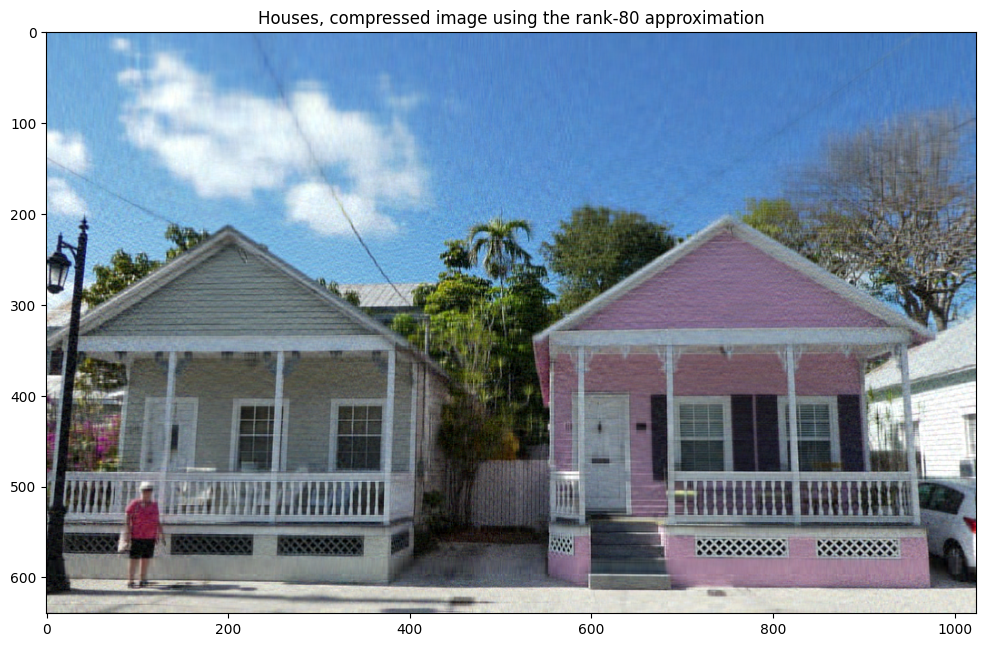

In [47]:
# Display the reconstructed image

fig = plt.figure(figsize=(12, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Houses, compressed image using the rank-{} approximation'.format(k))
plt.show()

Different values of $k$ results in different compression quality, the higher the $k$ is, the closer the compressed image to the original, but increasing $k$ means larger matrices.